In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [ ]:
music = pd.read_csv("20-23.csv",sep=';')

In [ ]:
music.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


In [ ]:
df=music[music["year"]==2023]

In [ ]:
df.head()

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
5,Daylight,David Kushner,gen z singer-songwriter,2023,130,43,51,-9,9,32,213,83,3,96


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 2384
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          46 non-null     object
 1   artist         46 non-null     object
 2   top genre      46 non-null     object
 3   year           46 non-null     int64 
 4   bpm            46 non-null     int64 
 5   energy         46 non-null     int64 
 6   danceability   46 non-null     int64 
 7   dB             46 non-null     int64 
 8   liveness       46 non-null     int64 
 9   valence        46 non-null     int64 
 10  duration       46 non-null     int64 
 11  acousticness   46 non-null     int64 
 12  speechiness    46 non-null     int64 
 13  popularity     46 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.4+ KB


In [ ]:
df.nunique()

title            46
artist           45
top genre        26
year              1
bpm              36
energy           34
danceability     32
dB                9
liveness         24
valence          36
duration         38
acousticness     33
speechiness      17
popularity       34
dtype: int64

In [ ]:
df.shape

(46, 14)

In [ ]:
df.describe()

,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
count,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,2023.0,126.000000,64.152174,65.782609,-6.673913,17.586957,51.304348,192.043478,26.086957,9.434783,56.043478
std,0.0,32.706778,16.026322,12.003542,1.850578,11.389227,20.854916,38.761353,25.178321,8.850994,29.906489
min,2023.0,67.000000,29.000000,39.000000,-11.000000,3.000000,10.000000,124.000000,0.000000,2.000000,5.000000
25%,2023.0,98.500000,55.500000,57.000000,-8.000000,9.000000,37.250000,173.250000,5.250000,4.000000,31.250000
50%,2023.0,122.000000,66.500000,66.500000,-6.500000,13.000000,51.000000,184.500000,19.500000,6.000000,44.500000
75%,2023.0,144.750000,74.000000,75.500000,-5.250000,23.000000,62.500000,210.000000,42.000000,9.500000,89.000000
max,2023.0,204.000000,91.000000,89.000000,-3.000000,50.000000,96.000000,321.000000,83.000000,34.000000,98.000000


# Most popular genres by mean popularity:

<ipython-input-24-4fab4d9a0b64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genres_by_mean_pop.values, y=genres_by_mean_pop.index, palette='viridis')


Text(0.5, 1.0, 'The most popular genres by mean popularity')

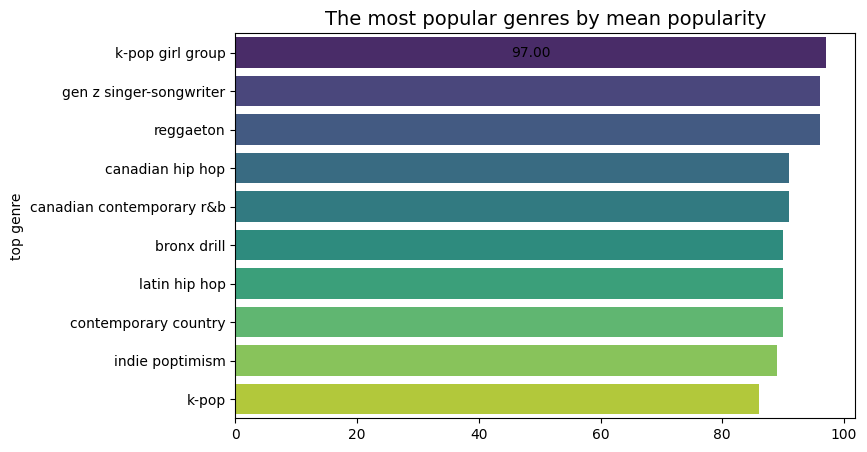

In [ ]:
genres_by_mean_pop = df.groupby('top genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=genres_by_mean_pop.values, y=genres_by_mean_pop.index, palette='viridis')
ax.bar_label(ax.containers[0], label_type='center', fmt='%.2f')
plt.title('The most popular genres by mean popularity', fontsize=14)

<ipython-input-25-167aa41a93ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genres_count.values, y=genres_count.index, palette='viridis')


Text(0.5, 1.0, 'The most popular genres of songs')

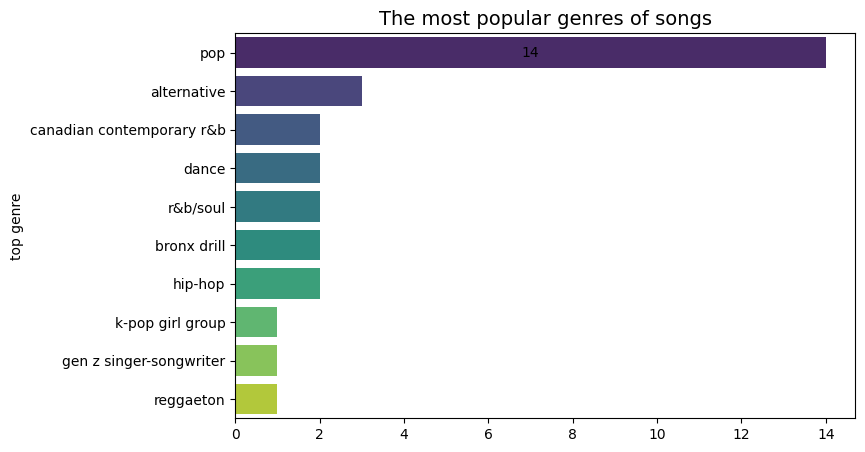

In [ ]:
genres_count = df['top genre'].value_counts().head(10)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=genres_count.values, y=genres_count.index, palette='viridis')
ax.bar_label(ax.containers[0], label_type='center')
plt.title('The most popular genres of songs', fontsize=14)

<ipython-input-26-f525e3102cd0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_songs_count.values, y=popular_songs_count.index, palette='viridis')


Text(0.5, 1.0, 'Number of Popular Songs by Artist')

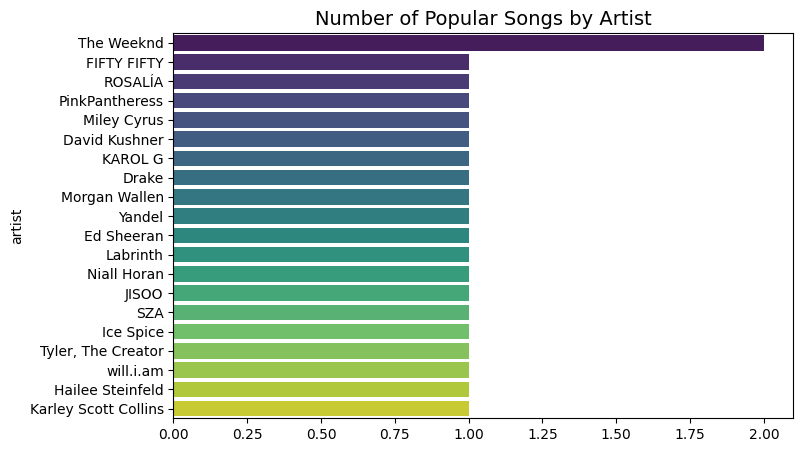

In [ ]:
popular_songs_count = df['artist'].value_counts().head(20)

plt.figure(figsize=(8, 5))
sns.barplot(x=popular_songs_count.values, y=popular_songs_count.index, palette='viridis')
plt.title('Number of Popular Songs by Artist', fontsize=14)

[('you', 4), ('the', 4), ('it', 4), ('s', 3), ('me', 3), ('kill', 2), ('up', 2), ('flowers', 1), ('cupid', 1), ('twin', 1)]


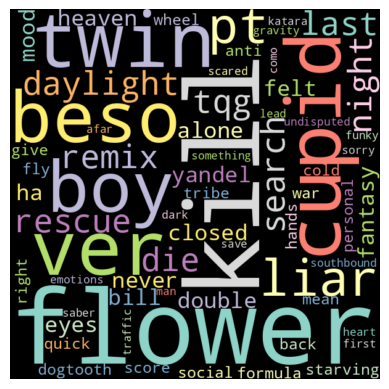

In [ ]:
from wordcloud import WordCloud
from collections import Counter
# Joining titles into a single string
text = ' '.join(df['title'])

# Removing text within parentheses, 'radio edit', 'version', converting to lowercase, and stripping leading/trailing whitespaces
text = re.sub(r'\([^)]*\)', '', text).lower().replace('radio edit', '').replace('version', '').strip()

# Tokenizing the text
words = re.findall(r'\b\w+\b', text)

# Counting word occurrences
word_counts = Counter(words)

# Getting top 10 words
top_10_words = word_counts.most_common(10)

print(top_10_words)

# Generating word cloud
wordcloud = WordCloud(width=600, height=600, margin=0, colormap='Set3').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

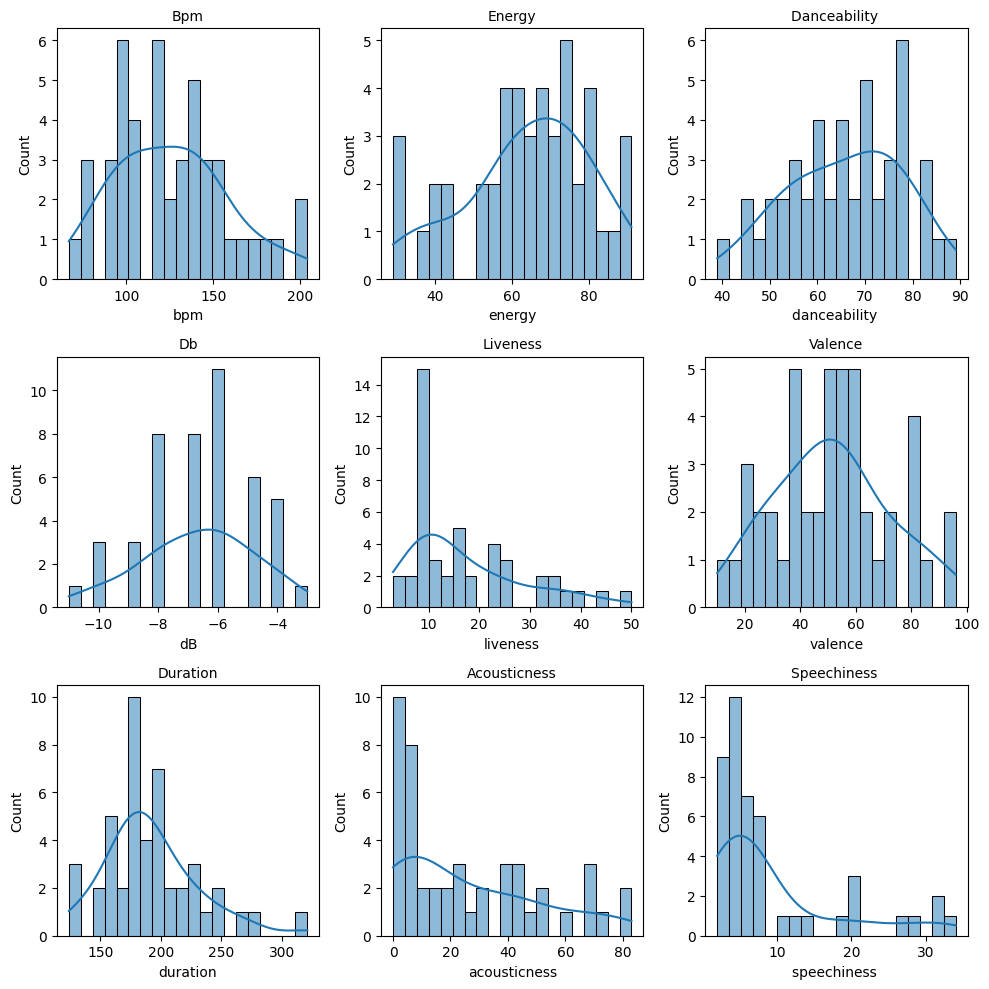

In [ ]:
columns = ['bpm', 'energy', 'danceability ', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness ']

fig, axes = plt.subplots(3,3, figsize=(10, 10))
axes = axes.flatten()


for i, col in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df, x=df[col], bins=20, kde=True, ax=ax)
    ax.set_title(col.capitalize(), fontsize=10)

plt.tight_layout()

#####  bpm = 130
#####  energy = 70
#####  dancebility = 75
#####  loudness = -6db
#####  liveness = 12
#####  valence = 55
#####  duration = 180s
#####  acousticness = 8
#####  speechiness = 5

In [ ]:
df_pop = df[df['top genre'].str.contains('pop')]
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 2383
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          19 non-null     object
 1   artist         19 non-null     object
 2   top genre      19 non-null     object
 3   year           19 non-null     int64 
 4   bpm            19 non-null     int64 
 5   energy         19 non-null     int64 
 6   danceability   19 non-null     int64 
 7   dB             19 non-null     int64 
 8   liveness       19 non-null     int64 
 9   valence        19 non-null     int64 
 10  duration       19 non-null     int64 
 11  acousticness   19 non-null     int64 
 12  speechiness    19 non-null     int64 
 13  popularity     19 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 2.2+ KB


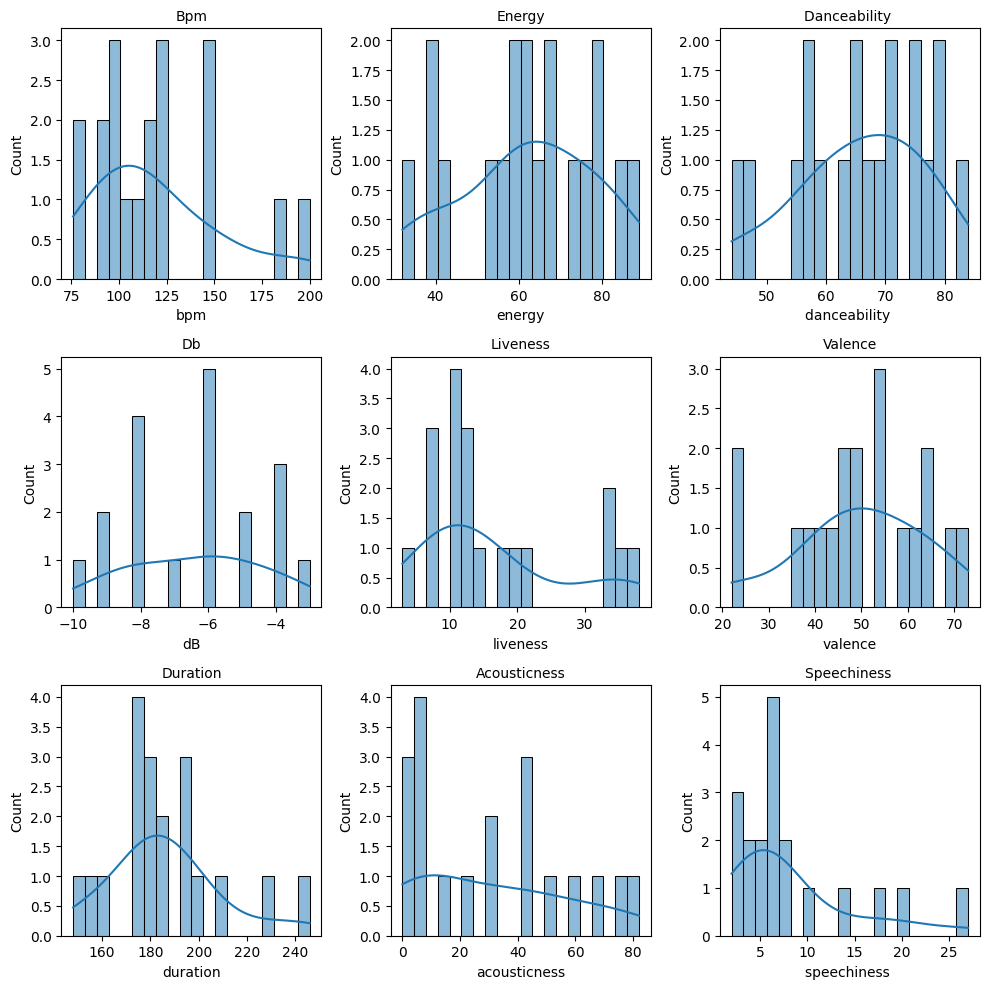

In [ ]:
columns = ['bpm', 'energy', 'danceability ', 'dB', 'liveness', 'valence', 'duration', 'acousticness', 'speechiness ']

fig, axes = plt.subplots(3,3, figsize=(10, 10))
axes = axes.flatten()


for i, col in enumerate(columns):
    ax = axes[i]
    sns.histplot(data=df_pop, x=df_pop[col], bins=20, kde=True, ax=ax)
    ax.set_title(col.capitalize(), fontsize=10)

plt.tight_layout()

## for pop in 2023

#####  bpm = 110 (130)
#####  energy = 65 (70)
#####  dancebility = 75
#####  loudness = -6db
#####  liveness = 12
#####  valence = 50 (55)
#####  duration = 180s
#####  acousticness = 10 (8)
#####  speechiness = 5

[('kill', 2), ('the', 2), ('flowers', 1), ('cupid', 1), ('twin', 1), ('ver', 1), ('beso', 1), ('eyes', 1), ('closed', 1), ('never', 1)]


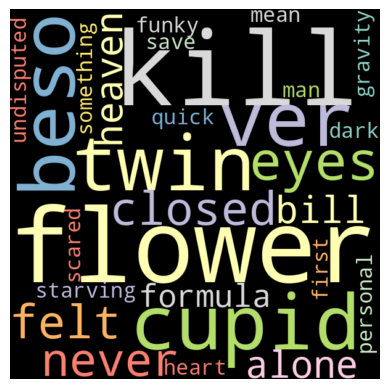

In [ ]:
from wordcloud import WordCloud
from collections import Counter
# Joining titles into a single string
text = ' '.join(df_pop['title'])

# Removing text within parentheses, 'radio edit', 'version', converting to lowercase, and stripping leading/trailing whitespaces
text = re.sub(r'\([^)]*\)', '', text).lower().replace('radio edit', '').replace('version', '').strip()

# Tokenizing the text
words = re.findall(r'\b\w+\b', text)

# Counting word occurrences
word_counts = Counter(words)

# Getting top 10 words
top_10_words = word_counts.most_common(10)

print(top_10_words)

# Generating word cloud
wordcloud = WordCloud(width=600, height=600, margin=0, colormap='Set3').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# music generation

In [ ]:

# characterstics of top music irrespective of genre
# bpm = 130
# energy = 70
# dancebility = 75
# loudness = -6
# liveness = 12
# valence = 55
# duration = 180
# acousticness = 8
# speechiness = 5

# top words in top music irrespective of genre
# ['you','the','it','s','me','kill','up','flowers','cupid','twin']

prompt = """Song title and melody: "Ethereal Embrace" with a dreamy and enchanting melody that captivates listeners.
Chord progression: A harmonious chord progression that complements the ethereal vibe of the song.
Genre and mood: Indie pop ballad with a mystical and introspective mood.
Instrumentation: Acoustic guitar, piano, strings, and light percussion to create a soft and atmospheric sound.
Tempo and rhythm: Medium tempo with a gentle and flowing rhythm that enhances the emotional impact of the song.
Musical elements: Harmonious vocals, emotive harmonies, and a melodic hook that lingers in the listener's mind.
Lyrics inspired by: 'you', 'the', 'it', 's', 'me', 'kill', 'up', 'flowers', 'cupid', 'twin' to create a poetic and evocative narrative that weaves these words seamlessly into the song's story.
Additional music attributes: BPM = 130, energy = 70, danceability = 75, loudness = -6, liveness = 12, valence = 55, duration = 180, acousticness = 8, speechiness = 5 to ensure the song aligns with the specified musical characteristics."""


In [ ]:
#install the required packages
!pip install git+https://github.com/huggingface/transformers.git

In [ ]:
from transformers import AutoProcessor, MusicgenForConditionalGeneration

processor = AutoProcessor.from_pretrained("facebook/musicgen-small")
model = MusicgenForConditionalGeneration.from_pretrained("facebook/musicgen-small")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/275 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
/usr/local/lib/python3.10/dist-packages/transformers/models/encodec/modeling_encodec.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

In [ ]:
#description of the music
inputs = processor(
    text=prompt,
    padding=True,

    return_tensors="pt",
)

audio_values = model.generate(**inputs, max_new_tokens=256)

In [ ]:
#Listen to the audio Samples
from IPython.display import Audio

sampling_rate = model.config.audio_encoder.sampling_rate
Audio(audio_values[0].numpy(), rate=sampling_rate)



In [ ]:
from google.colab import files
import scipy.io.wavfile as wavfile

sampling_rate = model.config.audio_encoder.sampling_rate
wavfile.write("musicgen_out1.wav", rate=sampling_rate, data=audio_values[0, 0].numpy())

# Save the file to local disk
files.download("musicgen_out1.wav")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# characterstics of top genre : pop (2023)
# bpm = 110
# energy = 65
# dancebility = 75
# loudness = -6
# liveness = 12
# valence = 50
# duration = 180
# acousticness = 10
# speechiness = 5

# top words in pop genre in 2023
#[kill','the','flowers','cupid','twin','ver','beso','eyes','closed','never']

prompt2 = """
# Song title and melody: "Ethereal Embrace" with a dreamy and enchanting melody that captivates listeners.
# Chord progression: A harmonious chord progression that complements the ethereal vibe of the song.
# Genre and mood: Indie pop ballad with a mystical and introspective mood.
# Instrumentation: Acoustic guitar, piano, strings, and light percussion to create a soft and atmospheric sound.
# Tempo and rhythm: Medium tempo with a gentle and flowing rhythm that enhances the emotional impact of the song.
# Musical elements: Harmonious vocals, emotive harmonies, and a melodic hook that lingers in the listener's mind.
# Lyrics inspired by: 'kill', 'the', 'flowers', 'cupid', 'twin', 'ver', 'beso', 'eyes', 'closed', 'never' to create a poetic and evocative narrative that weaves these words seamlessly into the song's story.
# Additional music attributes:
# BPM: 110
# Energy: 65
# Danceability: 75
# Loudness: -6
# Liveness: 12
# Valence: 50
# Duration: 180
# Acousticness: 10
# Speechiness: 5"""




In [ ]:
#description of the music
inputs = processor(
    text=prompt2,
    padding=True,

    return_tensors="pt",
)

audio_values = model.generate(**inputs, max_new_tokens=256)

In [ ]:
#Listen to the audio Samples
from IPython.display import Audio

sampling_rate = model.config.audio_encoder.sampling_rate
Audio(audio_values[0].numpy(), rate=sampling_rate)

In [ ]:
sampling_rate = model.config.audio_encoder.sampling_rate
wavfile.write("musicgen_out2.wav", rate=sampling_rate, data=audio_values[0, 0].numpy())

# Save the file to local disk
files.download("musicgen_out2.wav")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>